In [1]:
import numpy as np
from PIL import Image
import os
import cv2
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

In [2]:
from matplotlib.pyplot import figure
from PIL import Image
im = Image.open("/content/drive/MyDrive/data_mtp/amp_20161011.tif") #load an image file
im1 = np.array(im )

figure(figsize=(20, 15), dpi=80)
plt.imshow(im1)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/data_mtp/amp_20161011.tif'

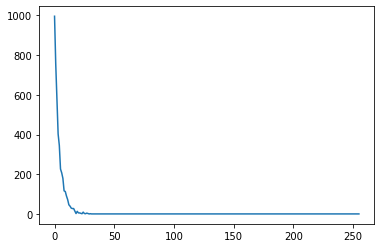

In [ ]:
histg = cv2.calcHist([im1],[0],None,[256],[0,256])
plt.plot(histg)
plt.show()

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/drive/MyDrive/data_mtp/amp_20161011.tif", cv2.IMREAD_GRAYSCALE)
_, segmented1 = cv2.threshold(img, 100,255,cv2.THRESH_BINARY)
np.set_printoptions(threshold=np.inf)
print(segmented1)

# imS = cv2.resize(segmented1, (1080, 720))              
# cv2_imshow( imS)                      

None


In [ ]:
# visualize only the masked regions in the image
masked = cv2.bitwise_and(image, image, mask=threshInv)
cv2.imshow("Output", masked)


78.0


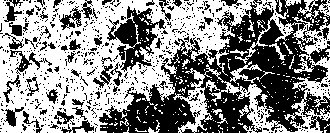

In [ ]:
thresh, segmented2 = cv2.threshold(img, 127,1,cv2.THRESH_OTSU)
segmented2 = segmented2.astype(dtype='f')
print(thresh)
# print(segmented2)
# print(segmented1)

mS = cv2.resize(segmented1, (1080, 720)) 
cv2_imshow( segmented1)



Text(0.5, 1.0, 'Filling the holes')

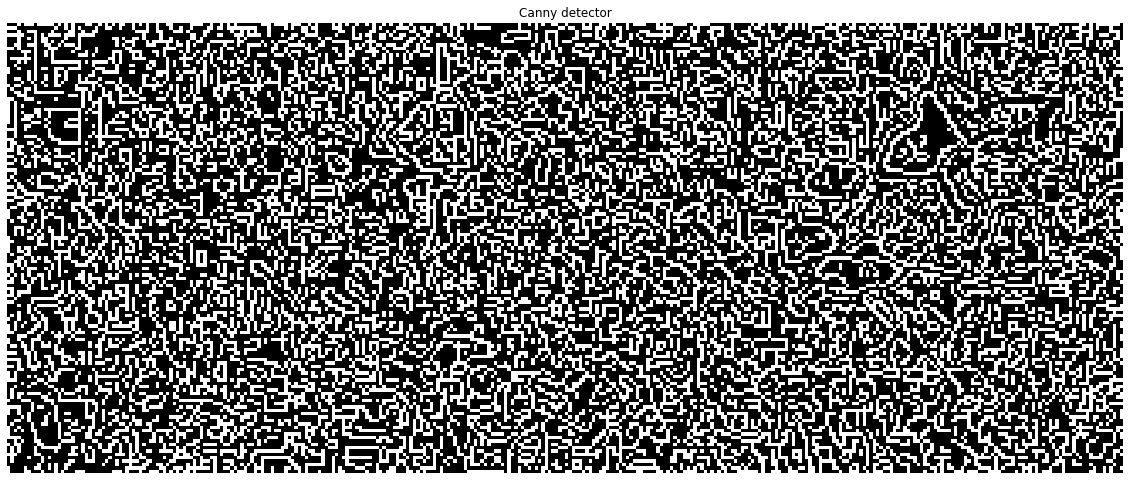

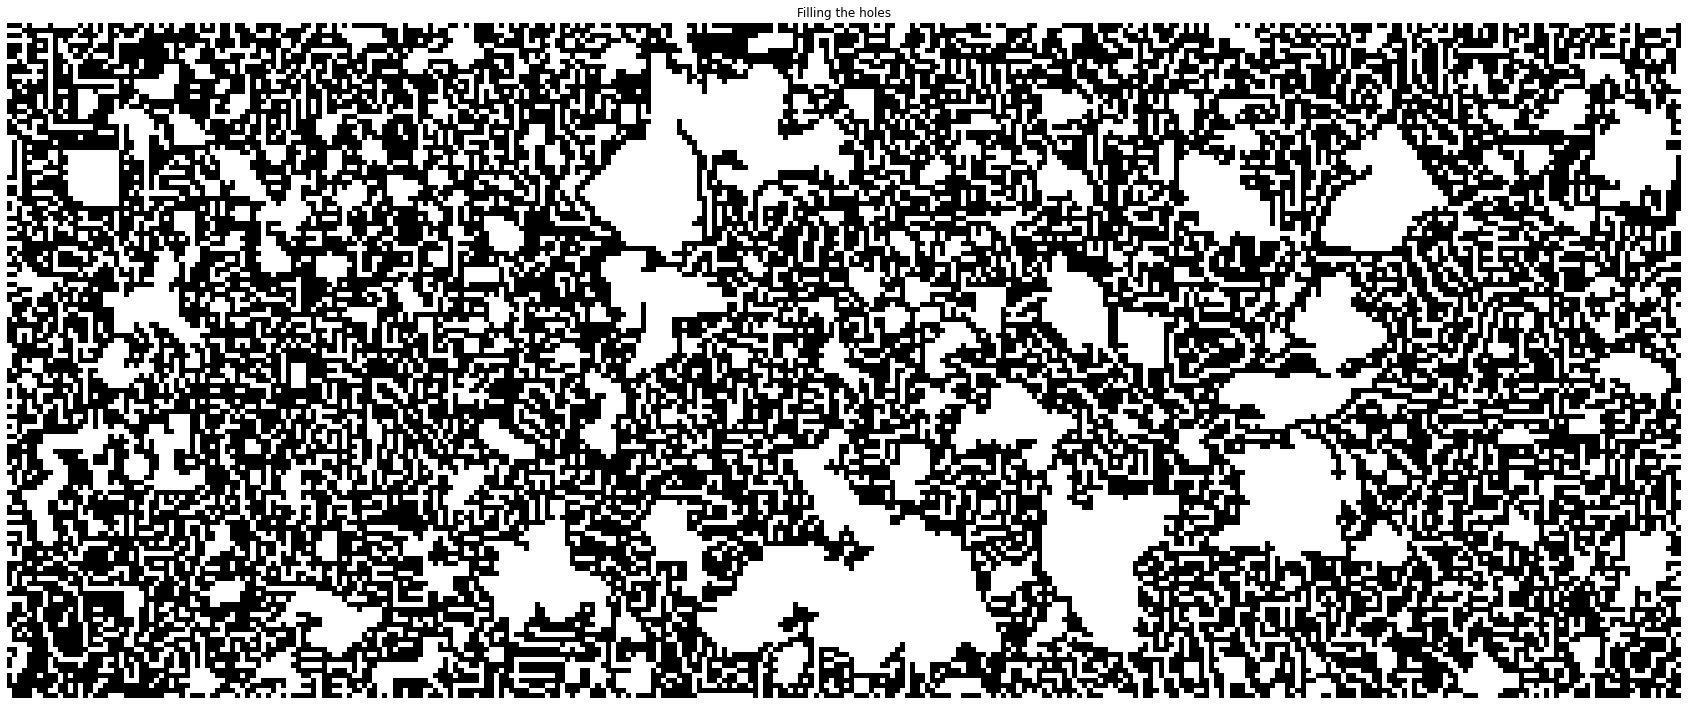

In [ ]:
import cv2 as cv
""" edge detection with canny """
from scipy import ndimage
img = cv.imread("/content/drive/MyDrive/data_mtp/Intensity/Extract27.tif",0)
edges = cv.Canny(img,10,100)


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(edges, cmap=plt.cm.gray)
ax.axis('off')
ax.set_title('Canny detector')
""" region - hole filling """
fill_holes = ndimage.binary_fill_holes(edges)
fig, ax = plt.subplots(figsize=(30, 20))
ax.imshow(fill_holes, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('Filling the holes')

In [ ]:
import numpy as np
import cv2
from matplotlib import  pyplot as plt

img = cv2.imread("/content/drive/MyDrive/data_mtp/amp_20161011.tif")

# Convert MxNx3 image into Kx3 where K=MxN
img2 = img.reshape((-1,3))  #-1 reshape means, in this case MxN

#We convert the unit8 values to float as it is a requirement of the k-means method of OpenCV
img2 = np.float32(img2)

#Define criteria, number of clusters and apply k-means
#When this criterion is satisfied, the algorithm iteration stops. 
#cv.TERM_CRITERIA_EPS — stop the algorithm iteration if specified accuracy, epsilon, is reached.
#cv.TERM_CRITERIA_MAX_ITER — stop the algorithm after the specified number of iterations, max_iter.
#cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER — stop the iteration when any of the above condition is met.
#Max iterations, in this example 10. 
#Epsilon, required accuracy, in this example 1.0

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Number of clusters
k = 2

# Number of attempts, number of times algorithm is executed using different initial labelings.
#Algorithm return labels that yield best compactness.
#compactness : It is the sum of squared distance from each point to their corresponding centers.

attempts = 10

#other flags needed as inputs for K-means
#Specify how initial seeds are taken.
#Two options, cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS

ret,label,center=cv2.kmeans(img2, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

#cv2.kmeans outputs 2 parameters.
#1 COmpactness. 
#2 Labels: Label array.
#3 Center. the array of centers of clusters. For k=4 we will have 4 centers.
#For RGB image, we will have center for each image, so tota 4x3 = 12.
#Now convert center values from float32 back into uint8.
center = np.uint8(center) 

#Next, we have to access the labels to regenerate the clustered image
res = center[label.flatten()]
res2 = res.reshape((img.shape)) #Reshape labels to the size of original image
##cv2.imwrite("images/segmented2.jpg", res2)
# res2 = cv2.cvtColor(res2, cv2.COLOR_GRAY2BGR)


figure_size = 30
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(2,1,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2),plt.imshow(res2)
plt.title('Segmented Image when K = %i' % k), plt.xticks([]), plt.yticks([])
plt.show()


TypeError: ignored